In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

%matplotlib inline

$$\frac{d^2\theta}{ds^2} = -c \cos(\theta)$$

On the domain 0 to $L$ with $L = 600$.

$$\theta(0) = 0$$

$$\frac{d\theta(600)}{ds} = K$$

Where $K = 0.0006693734347137342$ and $c = 8.360795454545455e-07$.

###  Setting up a guess with small angle approximation

For small $\theta$, $\cos(\theta) \approx 1$.

$$\frac{d^2\theta}{ds^2} = -c$$
so

$$\frac{d\theta}{ds} = -cs + C_1$$

$$C_1 = K + cL$$

$$\frac{d\theta}{ds} = -cs + cL + K$$

So a guess for the derivative at $s = 0$ is $cL + k$.

In [62]:
#  Define our ODEs
def equations(s, theta):
    theta_prime = np.zeros(2)
    
    c = 8.360795454545455e-07

    theta_prime[0] = theta[1]
    theta_prime[1] = -c * np.cos(theta[0])

    return theta_prime

Desired boundary =  6.693734347137342
fFrom solver:  6.707752708098273


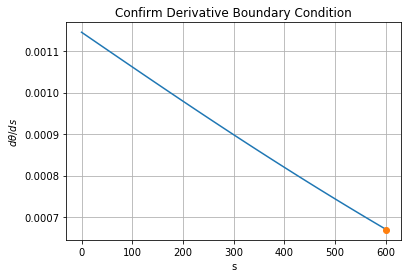

In [57]:
#  Constants
c = 8.360795454545455e-07
K = 0.0006693734347137342
L = 600

#  Define range of integration
x = np.linspace(0, L, 100)
xspan = (x[0],x[-1])

#  We use the small angle approximation for our initial guess
initial_guess = c * L + K

#  Then we adjust our guess until the derivative boundary condition is matched
#theta_0 = [0, initial_guess]
theta_0 = [0, 0.001145]

#  Solve the system
sol = solve_ivp(equations, xspan, theta_0, t_eval=x)

#  Plot the derivative and desired boundary value
plt.plot(x, sol.y[1,:])
plt.plot(L, K, 'o')
plt.title('Confirm Derivative Boundary Condition')
plt.grid(True)
plt.xlabel('s')
plt.ylabel(r'$d\theta/ds$')

#  Check to see of our approximate solution is close.  I multiplied both bu 1000 to make the numbers easier to compare by eye.
print('Desired boundary = ', 10000 * K)
print('fFrom solver: ', 10000 * sol.y[1, -1])

Text(0.5, 1.0, 'Solution')

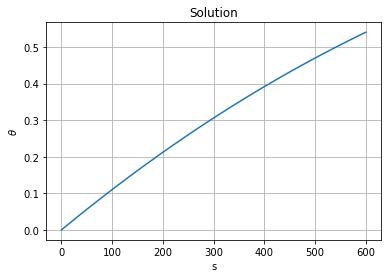

In [60]:
plt.plot(x, sol.y[0,:])
plt.grid(True)
plt.xlabel('s')
plt.ylabel(r'$\theta$')
plt.title('Solution')

##  With while loop

In [61]:
#  Desired tolerance
tol = 1e-6

#  Correct derivative is between these two numbers
low =  0.001
high = 0.002

#  Counter and maximum numer of iterations to avoid infinite loops
max_iters = 100
count = 0

while count <= max_iters:
    count = count + 1
    
    #  Derivative guess is average of bounds
    theta_prime0 = np.mean([low, high])    
    theta_0 = [0, theta_prime0 ]

    #  Solve the system
    sol = solve_ivp(equations, xspan, theta_0, t_eval = x)

    #  For ease of use, extract the function derivative values from the solution object.
    theta_prime = sol.y[1, :]

    #  Calculate percent error and break if within tolerance
    err = np.abs(theta_prime[-1] - K) / K
    if np.abs(err) <= tol:
        break
    
    #  Adjust our bounds if we are not within tolerance
    if theta_prime[-1] > K:
        high = theta_prime0
    else:
        low = theta_prime0
            

print('Correct initial derivative = ', theta_prime0)

Correct initial derivative =  0.0011436729431152344


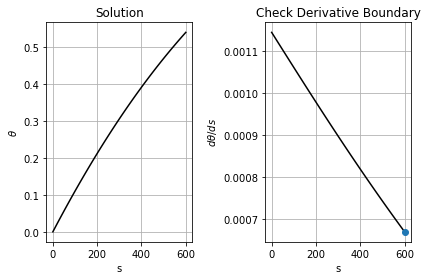

In [58]:
#  solve and plot the final results

theta_0 = [0, theta_prime0]
sol = solve_ivp(equations, xspan, theta_0, t_eval=x)

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.plot(x, sol.y[0,:], 'k')
ax1.grid(True)
ax1.set_xlabel('s')
ax1.set_ylabel(r'$\theta$')
ax1.set_title('Solution')

ax2.plot(x, sol.y[1,:], 'k')
ax2.plot(x[-1], K, 'o')
ax2.grid(True)
ax2.set_xlabel('s')
ax2.set_ylabel(r'$d\theta/ds$')
ax2.set_title('Check Derivative Boundary')

plt.tight_layout()